# Aprendizaje Supervisado

El objetivo es realizar predicciones precisas para nuevos datos con características similares a 
los datos usados para construir el modelo 

Se tienen:
Un set de datos que se separan en conjunto de prueba y entrenamiento (X_Test, X_Train), un conjunto de etiquetas Y (Y_Label)

La idea es que dado un dato nuevo, seamos capaces con el algoritmo de predecir su etiqueta en función de lo que aprendió este previamente usando X_train. 

El objetivo es realizar predicciones precisas para nuevos datos con características similares a los datos usados para construir el modelo 

## UnderFitting y Overfitting

Underfitting y overfitting son dos conceptos fundamentales en el aprendizaje automático y la estadística, relacionados con el desempeño de un modelo predictivo. Ambos términos describen problemas opuestos que pueden ocurrir durante el entrenamiento de un modelo.

### Underfitting

Underfitting ocurre cuando un modelo es demasiado simple para capturar la relación subyacente en los datos. Como resultado, el modelo no se ajusta bien a los datos de entrenamiento y tampoco se generaliza bien a nuevos datos. Esto puede deberse a varias razones:

* El modelo tiene muy pocos parámetros.
* El modelo no ha aprendido las características importantes de los datos.
* El modelo es demasiado básico (por ejemplo, un modelo lineal para datos no lineales).

### Consecuencias del underfitting:

* Bajo rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba.
* Incapacidad para capturar la tendencia de los datos.
* Error de entrenamiento y error de prueba altos.

### Overfitting

Overfitting ocurre cuando un modelo es demasiado complejo y se ajusta demasiado bien a los datos de entrenamiento, incluyendo el ruido y las particularidades específicas de ese conjunto de datos. Esto resulta en un excelente rendimiento en los datos de entrenamiento, pero un rendimiento deficiente en datos nuevos o no vistos.

* El modelo tiene demasiados parámetros.
* El modelo ha aprendido patrones específicos del conjunto de entrenamiento que no se generalizan a otros datos.
* Uso excesivo de características o de un modelo excesivamente complejo.

### Consecuencias del overfitting:

* Alto rendimiento en el conjunto de entrenamiento pero bajo rendimiento en el conjunto de prueba.
* El modelo es sensible al ruido y a las variaciones específicas del conjunto de entrenamiento.
* Error de entrenamiento bajo pero error de prueba alto.


Underfitting:

El modelo es demasiado simple y no captura la relación subyacente en los datos.
Ejemplo: Ajustar una línea recta a datos que claramente siguen una curva.

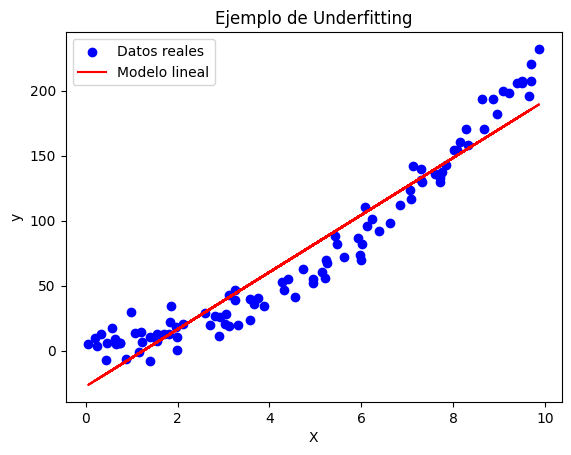

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generar datos
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X**2 + 3 * X + np.random.randn(100, 1) * 10

# Ajustar un modelo lineal
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Visualizar
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Modelo lineal')
plt.title('Ejemplo de Underfitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Notamos que los datos siguen claramente siguen un comportamiento cuadrático pero lo estamos aproximando con una recta. 

Overfitting:

El modelo es demasiado complejo y captura el ruido del conjunto de entrenamiento.
Ejemplo: Ajustar una curva muy detallada a un conjunto de datos con ruido, resultando en una curva que pasa exactamente por todos los puntos de los datos de entrenamiento.


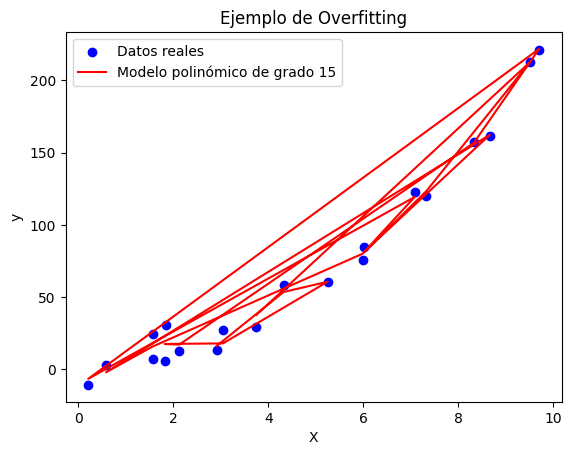

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generar datos
np.random.seed(42)
X = np.random.rand(20, 1) * 10
y = 2 * X**2 + 3 * X + np.random.randn(20, 1) * 10

# Ajustar un polinomio de grado alto
poly_model = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)

# Visualizar
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_poly_pred, color='red', label='Modelo polinómico de grado 15')
plt.title('Ejemplo de Overfitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# Medidas para evaluar la calidad de un problema de clasificación binaria

En el aprendizaje supervisado, nos interesa saber que tan bueno es un Modelo. Para ello utilizamos métricas de desempeño (Performance Metrics)

Básicamente lo que hacemos, es contrastar los valores predichos versus los valores reales

## Verdaderos Positivos (TP):

Son los casos en los que el modelo predijo correctamente la clase positiva.
Ejemplo: El modelo predice que un paciente tiene una enfermedad y efectivamente el paciente la tiene.

## Verdaderos Negativos (TN):

Son los casos en los que el modelo predijo correctamente la clase negativa.
Ejemplo: El modelo predice que un paciente no tiene una enfermedad y efectivamente el paciente no la tiene.

## Falsos Positivos (FP):

Son los casos en los que el modelo predijo incorrectamente la clase positiva.
Ejemplo: El modelo predice que un paciente tiene una enfermedad, pero en realidad no la tiene.
También conocido como "error de tipo I".

## Falsos Negativos (FN):

Son los casos en los que el modelo predijo incorrectamente la clase negativa.
Ejemplo: El modelo predice que un paciente no tiene una enfermedad, pero en realidad sí la tiene.
También conocido como "error de tipo II".

Estos valores se organizan comúnmente en una matriz de confusión, que es una tabla que permite visualizar el desempeño de un modelo de clasificación

                  Predicción Positiva    Predicción Negativa

       Clase Positiva        TP                    FN

       Clase Negativa        FP                    TN


## Métricas de Evaluación de un Modelo de Clasificación

Supongamos que tenemos un modelo de clasificación con los siguientes resultados:

- Verdaderos Positivos (TP) = 50
- Verdaderos Negativos (TN) = 40
- Falsos Positivos (FP) = 10
- Falsos Negativos (FN) = 20

Podemos calcular las métricas de evaluación de la siguiente manera:

### Precisión (Accuracy)

La precisión se define como la proporción de predicciones correctas (tanto positivas como negativas) sobre el total de predicciones:

$ \text{Precisión} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{50 + 40}{50 + 40 + 10 + 20} = \frac{90}{120} = 0.75 $

### Precisión (Precision)

La precisión se define como la proporción de verdaderos positivos sobre todas las predicciones positivas:

$ \text{Precisión} = \frac{TP}{TP + FP} = \frac{50}{50 + 10} = \frac{50}{60} = 0.83 $

### Exhaustividad (Recall o Sensibilidad)

La exhaustividad se define como la proporción de verdaderos positivos sobre todos los casos que son realmente positivos:

$ \text{Exhaustividad} = \frac{TP}{TP + FN} = \frac{50}{50 + 20} = \frac{50}{70} = 0.71 $

### Puntuación F1 (F1-Score)

La puntuación F1 es la media armónica de la precisión y la exhaustividad:

$ \text{F1-Score} = 2 \times \frac{\text{Precisión} \times \text{Exhaustividad}}{\text{Precisión} + \text{Exhaustividad}} = 2 \times \frac{0.83 \times 0.71}{0.83 + 0.71} = 0.77 $

### Especificidad (Specificity)

La especificidad se define como la proporción de verdaderos negativos sobre todos los casos que son realmente negativos:

$ \text{Especificidad} = \frac{TN}{TN + FP} = \frac{40}{40 + 10} = \frac{40}{50} = 0.80 $
